In [1]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/Assignmnet7&8/Training_Set.csv")

In [2]:
train.head()

,Attribute 1 (a1),Attribute 2 (a2),Class Label
0,2,11,2
1,2,13,2
2,2,15,2
3,2,27,1
4,2,39,1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Attribute 1 (a1)  30 non-null     int64
 1   Attribute 2 (a2)  30 non-null     int64
 2   Class Label       30 non-null     int64
dtypes: int64(3)
memory usage: 848.0 bytes


In [4]:
import missingno as msno

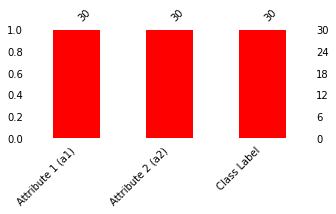

In [5]:
msno.bar(train,figsize=(5,2),color='red',fontsize=10)

#in the dataset we dont have any missing values and categorical data so we dont have to do any preprocessing on the dataset.<br>
we can directly get started with building our model

In [6]:
#data spliting 
X = train.drop("Class Label",axis=1)
y = train['Class Label']

In [7]:
X.head()

,Attribute 1 (a1),Attribute 2 (a2)
0,2,11
1,2,13
2,2,15
3,2,27
4,2,39


In [8]:
y.head()

0    2
1    2
2    2
3    1
4    1
Name: Class Label, dtype: int64

In [9]:
test = pd.read_csv("/content/drive/MyDrive/Assignmnet7&8/Validation_Set.csv")

In [10]:
test.head()

,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2,35,1,1,NaN,NaN,NaN
1,12,13,2,1,NaN,NaN,NaN
2,-4,45,2,2,NaN,NaN,NaN
3,2,17,2,2,NaN,NaN,NaN


In [11]:
X_test = test.iloc[:,:2]

In [12]:
X_test

,Attribute 1 (a1),Attribute 2 (a2)
0,2,35
1,12,13
2,-4,45
3,2,17


In [13]:
y_test = test['True Class Label']

In [14]:
y_test

0    1
1    2
2    2
3    2
Name: True Class Label, dtype: int64

<h2 style="color: tomato;"> #model building

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model_1 = DecisionTreeClassifier(max_depth=5)
model_1.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h2 style="color: tomato;"> #model evaluation

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
y_pred = model_1.predict(X_test)
y_pred

array([1, 1, 1, 2])

In [19]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [20]:
print("confusion matrix \n" , confusion_matrix(y_test,y_pred))
print("accuracy" , accuracy_score(y_test,y_pred))

confusion matrix 
 [[1 0]
 [2 1]]
accuracy 0.5


<h2 style="color: tomato;"> #Vis. of the Tree

In [21]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [22]:
features = list(train.columns[:2])

In [23]:
features

['Attribute 1 (a1)', 'Attribute 2 (a2)']

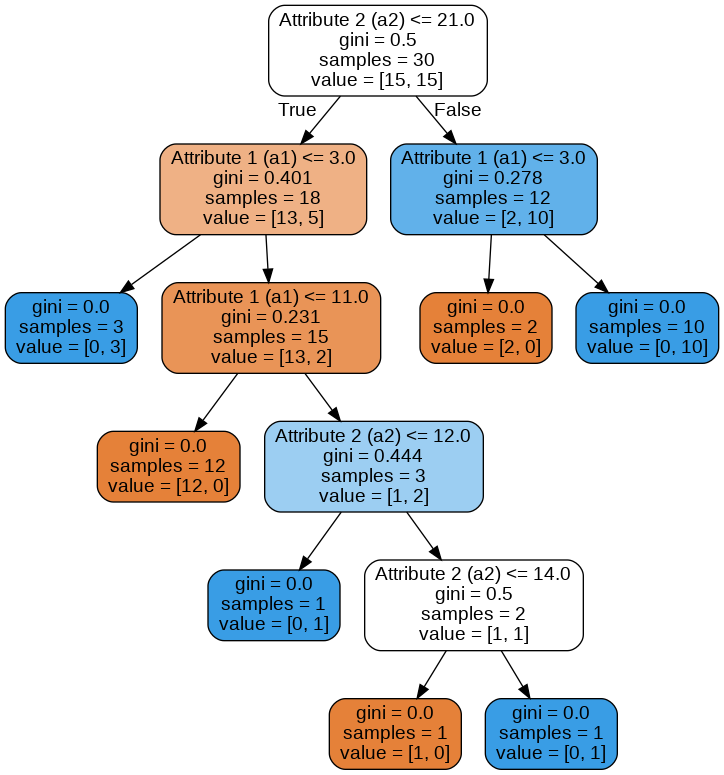

In [24]:
dot_data = StringIO()
export_graphviz(model_1 , out_file=dot_data,
               feature_names = features, filled = True,rounded = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h2 style="color: tomato;"> #Hyper parameter tunning

In [25]:
from sklearn.model_selection import GridSearchCV , KFold

In [26]:
params = {
    'max_depth':range(1,21,2),
    'min_samples_leaf' : range(1,6),
    'min_samples_split' : range(1,11),
    'criterion':['gini']
}

fold = KFold(n_splits=5 , shuffle=True , random_state=10)

In [27]:
model_2 = DecisionTreeClassifier()
grid_model = GridSearchCV(estimator=model_2 , param_grid=params ,
                          cv=fold , verbose=1 , return_train_score=True , n_jobs=-1)

In [28]:
grid_model.fit(X,y)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 2497 out of 2500 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    8.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_g

In [29]:
result = pd.DataFrame(grid_model.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002660,0.000359,0.000000,0.000000,gini,1,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002253,0.000138,0.001320,0.000033,gini,1,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,1.0,0.833333,0.666667,0.766667,0.133333,163,0.791667,0.791667,0.708333,0.75,0.791667,0.766667,0.033333
2,0.002187,0.000116,0.001307,0.000045,gini,1,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,1.0,0.833333,0.666667,0.766667,0.133333,163,0.791667,0.791667,0.708333,0.75,0.791667,0.766667,0.033333
3,0.002236,0.000122,0.001312,0.000020,gini,1,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,1.0,0.833333,0.666667,0.766667,0.133333,163,0.791667,0.791667,0.708333,0.75,0.791667,0.766667,0.033333
4,0.002250,0.000181,0.001303,0.000105,gini,1,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,1.0,0.833333,0.666667,0.766667,0.133333,163,0.791667,0.791667,0.708333,0.75,0.791667,0.766667,0.033333


In [30]:
best_score = grid_model.best_score_
best_hyper = grid_model.best_params_

In [31]:
print("score : {} \n params : {}".format(best_score,best_hyper))

score : 0.9333333333333333 
 params : {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [32]:
print(grid_model.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [33]:
#model with optimal hyperparameter
optimal_model = DecisionTreeClassifier(criterion='gini',
                                       random_state = 100 , 
                                       max_depth= 3,
                                       min_samples_leaf=1,
                                       min_samples_split=2)

optimal_model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [34]:
optimal_model.score(X_test,y_test)

0.75

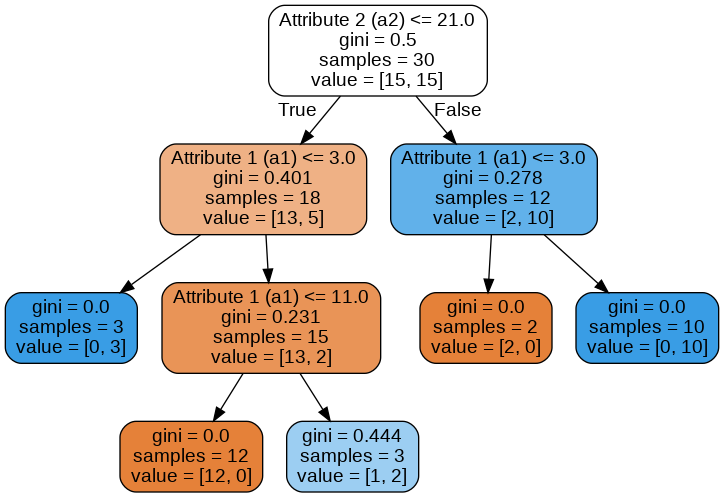

In [35]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(optimal_model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [36]:
y_pred = optimal_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [37]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1 0]
 [1 2]]
0.75


In [38]:
y_pred

array([1, 2, 1, 2])

In [39]:
y_test

0    1
1    2
2    2
3    2
Name: True Class Label, dtype: int64

so we got a test accuracy of 75%